<img src="https://devra.ai/analyst/notebook/3669/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
    <div style="font-size:150%; color:#FEE100"><b>Car Price Prediction Analysis</b></div>
    <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

## Table of Contents

- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictor Building](#Predictor-Building)
- [Conclusion](#Conclusion)

In [1]:
# Import required libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Ensure matplotlib uses the 'Agg' backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is imported
%matplotlib inline

import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set seaborn style for better visuals
sns.set(style="darkgrid")

print('Imports and settings are complete.')

Imports and settings are complete.


## Introduction

The automobile market is dynamic and complex. In this notebook, we examine a car price prediction dataset that contains several numerical and categorical features. Our curiosity centers on uncovering the hidden factors that drive car pricing, and we even attempt to predict the price based on some key variables using a regression model. If you find the notebook useful, please consider upvoting it.

In [2]:
# Data Loading
import os

# Define the path to the dataset
data_path = '/kaggle/input/car-price-prediction-dataset/car_price_dataset_medium.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows of the DataFrame
print('Data has been loaded successfully. Here are the first few rows:')
df.head()

Data has been loaded successfully. Here are the first few rows:


,Car_ID,Brand,Model_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
0,1,Audi,2005,197018,Diesel,Manual,First,4046,223.6,29.61,6,119611.94
1,2,BMW,2019,43467,Hybrid,Automatic,First,3731,248.4,21.66,5,90842.46
2,3,Kia,2012,153697,Hybrid,Automatic,Third,4925,465.5,12.14,6,78432.24
3,4,Mercedes,2015,38893,Petrol,Automatic,Second,3771,229.7,19.65,6,44568.89
4,5,Audi,2016,81329,Hybrid,Automatic,First,2817,573.2,7.74,5,8751.82


## Data Cleaning and Preprocessing

Before diving into analysis, we inspect the dataset for missing values, data types, and inconsistencies. Note that while the dataset does not contain explicit date columns, it does include important numerical and categorical columns.

In [3]:
# Inspect the data structure
print('DataFrame shape:', df.shape)
print('\nDataFrame info:')
df.info()

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Describe numerical columns
print('\nStatistical Summary of Numeric Features:')
display(df.describe())

# Optional: if any categorical cleaning is required, this is a good place to perform that.
# In this case, we assume the provided dataset is fairly clean.

DataFrame shape: (1000, 12)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             1000 non-null   int64  
 1   Brand              1000 non-null   object 
 2   Model_Year         1000 non-null   int64  
 3   Kilometers_Driven  1000 non-null   int64  
 4   Fuel_Type          1000 non-null   object 
 5   Transmission       1000 non-null   object 
 6   Owner_Type         1000 non-null   object 
 7   Engine_CC          1000 non-null   int64  
 8   Max_Power_bhp      1000 non-null   float64
 9   Mileage_kmpl       1000 non-null   float64
 10  Seats              1000 non-null   int64  
 11  Price_USD          1000 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 93.9+ KB

Missing values in each column:
Car_ID               0
Brand                0
Model_Year           0
Kilometers_Dr

,Car_ID,Model_Year,Kilometers_Driven,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,2014.491000,103397.074000,2878.299000,320.939900,17.34144,4.665000,59217.249420
std,288.819436,5.710738,57417.612935,1212.337697,160.384514,7.29799,1.802783,33545.254183
min,1.000000,2005.000000,5155.000000,801.000000,40.500000,5.04000,2.000000,3028.420000
25%,250.750000,2009.750000,52188.500000,1818.250000,184.825000,10.97000,4.000000,30030.822500
50%,500.500000,2015.000000,102449.000000,2857.500000,314.650000,17.14500,5.000000,56806.745000
75%,750.250000,2019.000000,152696.500000,3959.500000,455.300000,24.03500,6.000000,87088.897500
max,1000.000000,2024.000000,199812.000000,4996.000000,599.600000,29.99000,7.000000,119611.940000


## Exploratory Data Analysis

In this section, we explore the distributions and relationships within the data. We create several visualizations that illustrate the behavior of the key features. Some plots include histograms, heatmaps, and box plots to reveal trends and potential outliers.

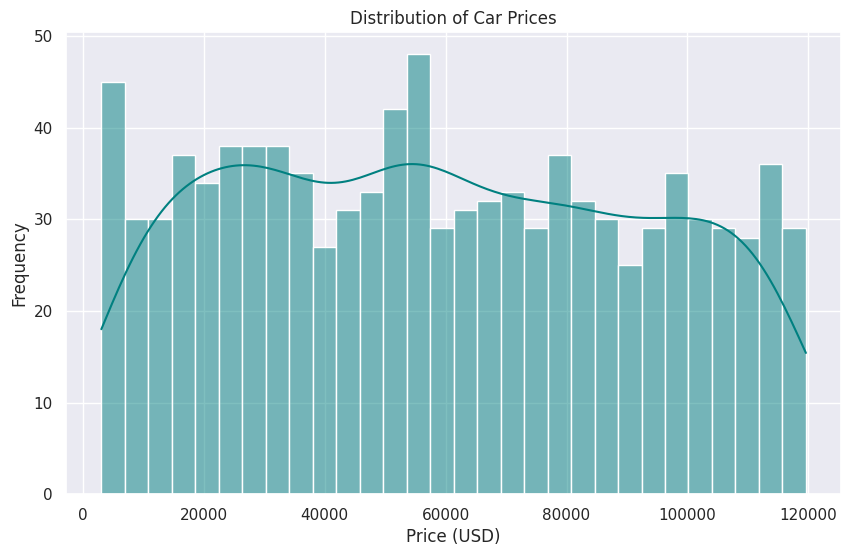

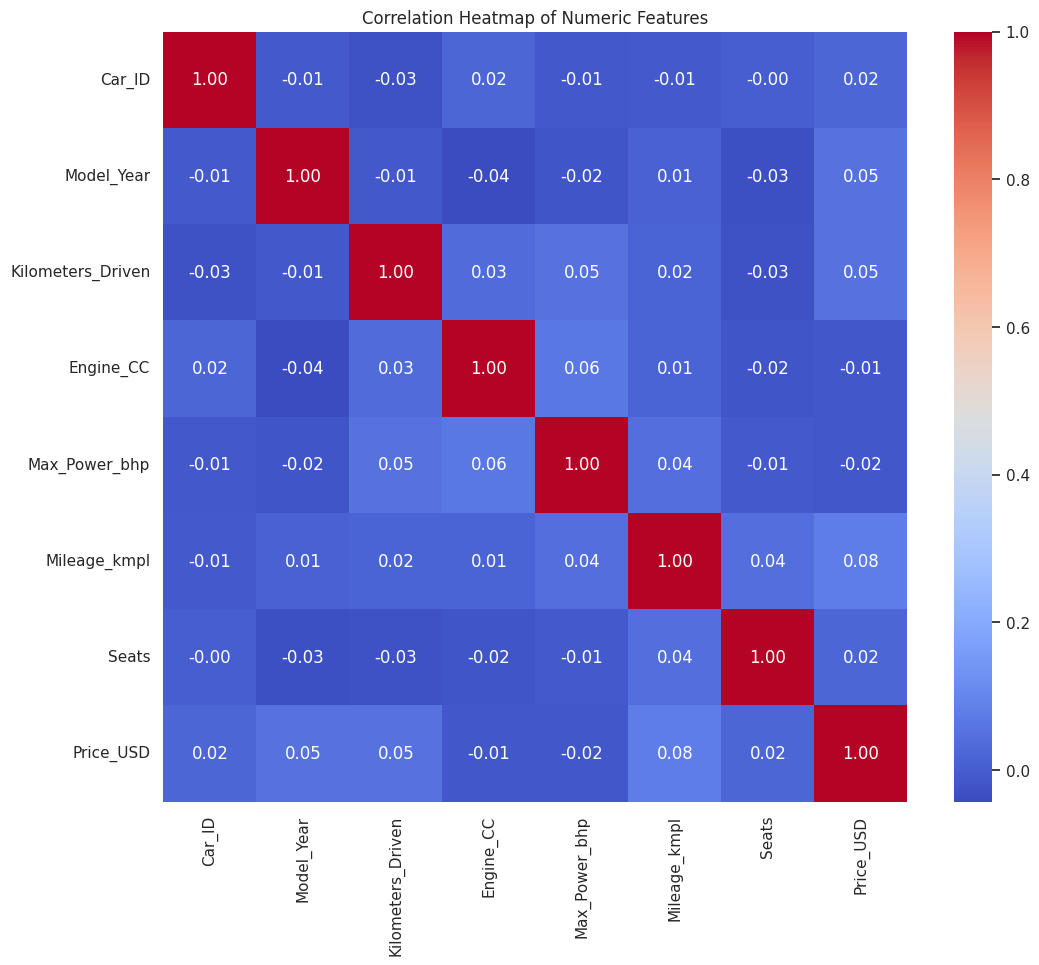

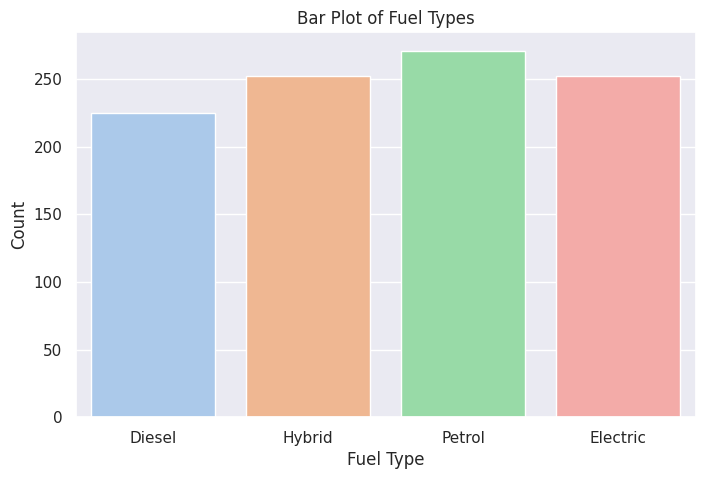

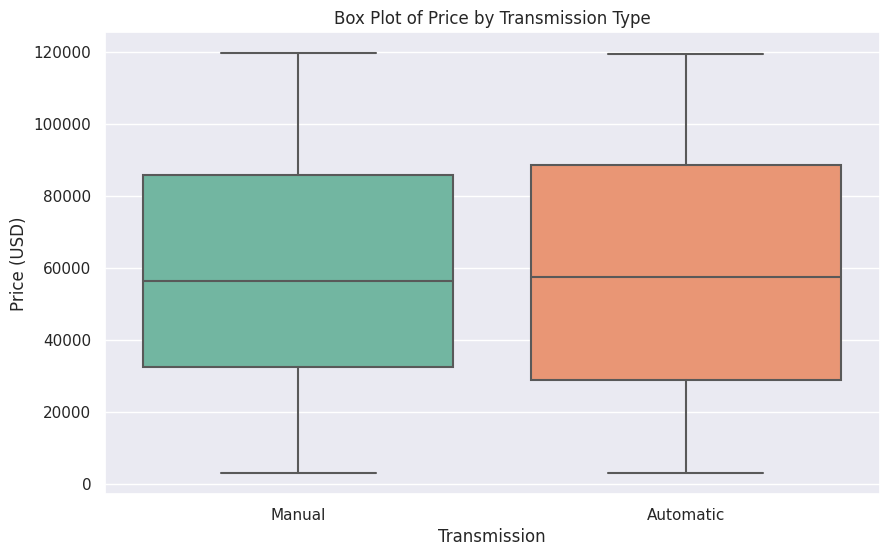

EDA plots generated (plots will display when running the notebook).


In [4]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt

# Define a function for displaying plots to avoid repetition
def show_plot(title=''):
    plt.title(title)
    plt.show()

###########################
# 1. Distribution of Car Prices
###########################
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_USD'], kde=True, bins=30, color='teal')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
show_plot('Distribution of Car Prices')

###########################
# 2. Correlation Heatmap among Numeric Features
###########################
numeric_df = df.select_dtypes(include=[np.number])

# Ensure sufficient numeric columns for a heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    show_plot('Correlation Heatmap of Numeric Features')
else:
    print('Not enough numeric columns for a correlation heatmap.')

###########################
# 3. Count Plot for Fuel Type
###########################
plt.figure(figsize=(8, 5))
sns.countplot(x='Fuel_Type', data=df, palette='pastel')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
show_plot('Bar Plot of Fuel Types')

###########################
# 4. Box Plot of Price by Transmission Type
###########################
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price_USD', data=df, palette='Set2')
plt.xlabel('Transmission')
plt.ylabel('Price (USD)')
show_plot('Box Plot of Price by Transmission Type')

# Additional visualizations can be added as needed.
print('EDA plots generated (plots will display when running the notebook).')

## Predictor Building

We now build a simple linear regression model to predict the car price using select features. Considering that car pricing is influenced by many variables, we limit our regression to a few key features for demonstration. We then evaluate the model using common regression metrics such as the R² score.

Linear Regression Model Performance:
R² Score: -0.02506114739186227
Mean Absolute Error: 29495.786756652175
Mean Squared Error: 1144869602.21751


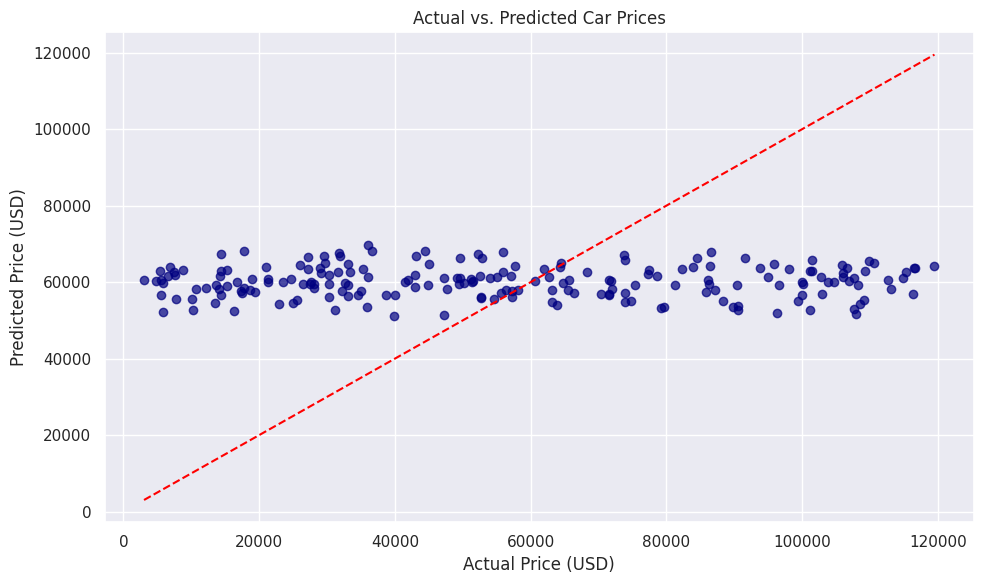

In [5]:
# Predictor Building: Linear Regression to predict Price_USD

# Selecting features for the prediction model
# We drop 'Car_ID' since it is an identifier and not a predictor.
# Also, categorical variables could be encoded, however, for simplicity, we focus on numeric features.
features = ['Model_Year', 'Kilometers_Driven', 'Engine_CC', 'Max_Power_bhp', 'Mileage_kmpl', 'Seats']
target = 'Price_USD'

# Extracting the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Linear Regression Model Performance:')
print('R² Score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

# Visualizing predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='navy')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Car Prices')
plt.tight_layout()
plt.show()

# Note: Future work could involve incorporating categorical features using encoding techniques and exploring more sophisticated models.

## Conclusion

Our analysis provided insights into the factors that potentially influence car prices. A variety of visualization techniques allowed us to explore distributions and relationships in the dataset, and the linear regression model gave a first-pass prediction of car prices. While our simplistic approach used just a handful of numerical features, further analysis could incorporate categorical features with proper encoding and more advanced models to improve predictive performance.

The notebook demonstrates that exploring and understanding the data is as important as model building. Future directions could include feature engineering, hyperparameter tuning, and a deeper dive into non-linear modeling techniques.

If you found the notebook interesting and useful, please consider upvoting it.